In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import json
from itertools import groupby

import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import networkx as nx

from minimal.imaging import draw_plan, blit_rooms
from minimal.layout import NodeType, NODE_COLOR, NODE_NAME
from minimal import sample_graphs
from minimal.gen import _load_segmentation_dict
from minimal.lib import gen_segmentation_mask, assemble_plan
from minimal.doors import create_cut_wall_mask
from minimal.layout import InputLayoutBuilder, InputLayout, NodeType

from minimal.walls import (
    CC_T,
    CC_R,
    CC_B,
    CC_L,
    CC_TL,
    CC_TR,
    CC_BR,
    CC_BL,
)
%matplotlib inline

InputLayout(node_types=[0, 1, 2, 2, 2, 3, 3, 3, 4, 14], edges=[(0, 2), (0, 1), (0, 3), (0, 4), (0, 9), (2, 5), (2, 8), (3, 6), (4, 7)])


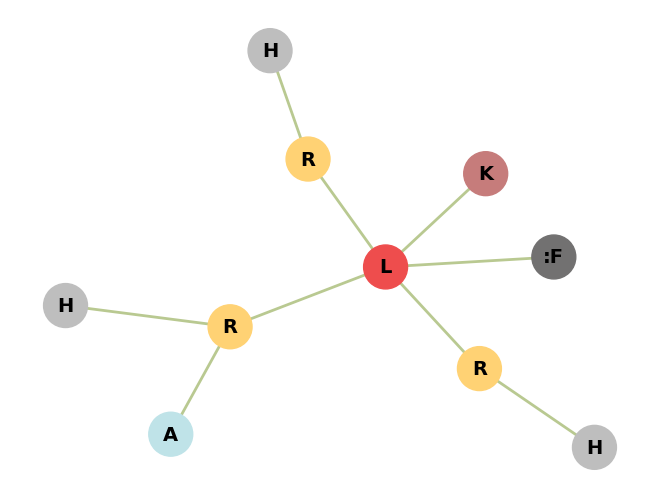

In [23]:
bld = InputLayoutBuilder()

liv = bld.add_node(NodeType.LIVING_ROOM)
bed1 = bld.add_node(NodeType.BEDROOM)
bed2 = bld.add_node(NodeType.BEDROOM)
bed3 = bld.add_node(NodeType.BEDROOM)
bath1 = bld.add_node(NodeType.BATHROOM)
bath2 = bld.add_node(NodeType.BATHROOM)
bath3 = bld.add_node(NodeType.BATHROOM)
kit = bld.add_node(NodeType.KITCHEN)
bal1 = bld.add_node(NodeType.BALCONY)
# bal2 = bld.add_node(NodeType.BALCONY)


bld.add_edge(liv, bed1)
bld.add_edge(liv, kit)
bld.add_edge(bed1, bath1)
# bld.add_edge(liv, bal2)
bld.add_edge(bed1, bal1)
bld.add_edge(liv, bed2)
bld.add_edge(bed2, bath2)


bld.add_edge(liv, bed3)
bld.add_edge(bed3, bath3)

L = bld.build()

print(L)

L.draw()

In [24]:
# InputLayout(node_types=[0, 1, 2, 3, 14], edges=[(0, 2), (0, 1), (0, 4), (2, 3)])
# InputLayout(node_types=[0, 1, 2, 3, 4, 14], edges=[(0, 2), (0, 1), (0, 5), (2, 3), (2, 4)])
# InputLayout(node_types=[0, 1, 2, 3, 4, 14], edges=[(0, 2), (0, 1), (0, 4), (0, 5), (2, 3)])
# InputLayout(node_types=[0, 1, 2, 3, 4, 4, 14], edges=[(0, 2), (0, 1), (0, 4), (0, 6), (2, 3), (2, 5)])
# InputLayout(node_types=[0, 1, 2, 3, 3, 4, 4, 14], edges=[(0, 2), (0, 1), (0, 5), (0, 4), (0, 7), (2, 3), (2, 6)])
# InputLayout(node_types=[0, 1, 2, 2, 3, 4, 4, 14], edges=[(0, 2), (0, 1), (0, 5), (0, 3), (0, 7), (2, 4), (2, 6)])
# InputLayout(node_types=[0, 1, 2, 2, 3, 3, 4, 4, 14], edges=[(0, 2), (0, 1), (0, 6), (0, 3), (0, 8), (2, 4), (2, 7), (3, 5)])
# InputLayout(node_types=[0, 1, 2, 2, 3, 3, 3, 4, 4, 14], edges=[(0, 2), (0, 1), (0, 7), (0, 3), (0, 6), (0, 9), (2, 4), (2, 8), (3, 5)])
# InputLayout(node_types=[0, 1, 2, 2, 3, 3, 3, 4, 14], edges=[(0, 2), (0, 1), (0, 3), (0, 6), (0, 8), (2, 4), (2, 7), (3, 5)])
# InputLayout(node_types=[0, 1, 2, 2, 2, 3, 3, 3, 4, 14], edges=[(0, 2), (0, 1), (0, 3), (0, 4), (0, 9), (2, 5), (2, 8), (3, 6), (4, 7)])

In [6]:
InputLayout([0, 1, 2, 2, 3, 3, 3, 4, 14], [(0, 2), (0, 1), (0, 3), (0, 6), (0, 8), (2, 4), (2, 7), (3, 5)])

InputLayout(node_types=[0, 1, 2, 2, 3, 3, 3, 4, 14], edges=[(0, 2), (0, 1), (0, 3), (0, 6), (0, 8), (2, 4), (2, 7), (3, 5)])